In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [51]:
df = pd.read_csv('train.csv')

In [52]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [58]:
new_df = df.sample(70000, random_state=2)

In [59]:
new_df.shape

(70000, 6)

# Preprocessing data -->

In [53]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

In [56]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [60]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
dtype: int64

In [61]:
new_df.dropna(subset=['question2'], inplace=True)

In [62]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [85]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [63]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [64]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9


In [65]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [66]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3


In [67]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [68]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13


In [69]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23


# Advance Featuring...

In [70]:
import nltk
from nltk.corpus import stopwords

def fetch_token_features(row):
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001
    
    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    #converting the senctence into token:
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    
    #get the non-stop words in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #get the stop words in questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    #get the common not-stop words from questions pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    #get the common stop words from the question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    #get the common token from the question pair
    common_token_count  = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features
    

In [71]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [72]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46,0.874989,0.874989,0.999975,0.999975,0.916659,0.916659,1,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30,0.833319,0.714276,0.499988,0.333328,0.583328,0.466664,1,1
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06,0.000000,0.000000,0.499988,0.285710,0.117646,0.080000,0,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23,0.749981,0.499992,0.000000,0.000000,0.599988,0.333330,1,0


In [73]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to C:\Users\MOHIT
[nltk_data]     RANJAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [74]:
def stem_sentence(sentence):
    words = word_tokenize(sentence)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

new_df['q1_stem'] = new_df['question1'].apply(stem_sentence)
new_df['q2_stem'] = new_df['question2'].apply(stem_sentence)

In [75]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,q1_stem,q2_stem
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46,0.874989,0.874989,0.999975,0.999975,0.916659,0.916659,1,1,what is the best market autom tool for small a...,what is the best market autom tool for small a...
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30,0.833319,0.714276,0.499988,0.333328,0.583328,0.466664,1,1,i am poor but i want to invest . what should i...,i am quit poor and i want to be veri rich . wh...
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06,0.000000,0.000000,0.499988,0.285710,0.117646,0.080000,0,0,i am from india and live abroad . i met a guy ...,t.i.e.t to thapar univers to thapar univers in...
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,whi do so mani peopl in the u.s. hate the sout...,my boyfriend doesnt feel guilti when he hurt m...
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23,0.749981,0.499992,0.000000,0.000000,0.599988,0.333330,1,0,consequ of bhopal ga tragedi ?,what wa the reason behind the bhopal ga tragedi ?


In [76]:
latest_df = new_df.copy()

In [77]:
latest_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,q1_stem,q2_stem
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46,0.874989,0.874989,0.999975,0.999975,0.916659,0.916659,1,1,what is the best market autom tool for small a...,what is the best market autom tool for small a...
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30,0.833319,0.714276,0.499988,0.333328,0.583328,0.466664,1,1,i am poor but i want to invest . what should i...,i am quit poor and i want to be veri rich . wh...
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06,0.000000,0.000000,0.499988,0.285710,0.117646,0.080000,0,0,i am from india and live abroad . i met a guy ...,t.i.e.t to thapar univers to thapar univers in...
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,whi do so mani peopl in the u.s. hate the sout...,my boyfriend doesnt feel guilti when he hurt m...
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23,0.749981,0.499992,0.000000,0.000000,0.599988,0.333330,1,0,consequ of bhopal ga tragedi ?,what wa the reason behind the bhopal ga tragedi ?


In [78]:
# Assuming your DataFrame is called 'df'
total_words_q1 =latest_df['question1'].apply(lambda x: len(str(x).split())).sum()
print("Total number of words in question1:", total_words_q1)

total_stemmed_words_q1 =latest_df['q1_stem'].apply(lambda x: len(str(x).split())).sum()
print("Total number of words in question1:", total_stemmed_words_q1)

total_words_q2 = latest_df['question2'].apply(lambda x: len(str(x).split())).sum()
print("Total number of words in question1:", total_words_q2)

total_stemmed_words_q2 =latest_df['q2_stem'].apply(lambda x: len(str(x).split())).sum()
print("Total number of words in question1:", total_stemmed_words_q1)

Total number of words in question1: 765476
Total number of words in question1: 869836
Total number of words in question1: 782993
Total number of words in question1: 869836


In [79]:
latest_df.drop(['question1', 'question2'], axis=1, inplace=True)

In [80]:
latest_df.head()

,id,qid1,qid2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,q1_stem,q2_stem
398782,398782,496695,532029,1,76,77,12,12,11,24,0.46,0.874989,0.874989,0.999975,0.999975,0.916659,0.916659,1,1,what is the best market autom tool for small a...,what is the best market autom tool for small a...
115086,115086,187729,187730,0,49,57,12,15,7,23,0.30,0.833319,0.714276,0.499988,0.333328,0.583328,0.466664,1,1,i am poor but i want to invest . what should i...,i am quit poor and i want to be veri rich . wh...
327711,327711,454161,454162,0,105,120,25,17,2,34,0.06,0.000000,0.000000,0.499988,0.285710,0.117646,0.080000,0,0,i am from india and live abroad . i met a guy ...,t.i.e.t to thapar univers to thapar univers in...
367788,367788,498109,491396,0,59,146,12,30,0,32,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,whi do so mani peopl in the u.s. hate the sout...,my boyfriend doesnt feel guilti when he hurt m...
151235,151235,237843,50930,0,35,50,5,9,3,13,0.23,0.749981,0.499992,0.000000,0.000000,0.599988,0.333330,1,0,consequ of bhopal ga tragedi ?,what wa the reason behind the bhopal ga tragedi ?


In [113]:
!pip install Distance

                                              0.0/180.3 kB ? eta -:--:--
     ------                                  30.7/180.3 kB 1.3 MB/s eta 0:00:01
     ------------                          61.4/180.3 kB 648.1 kB/s eta 0:00:01
     ----------------------               112.6/180.3 kB 726.2 kB/s eta 0:00:01
     ----------------------------         143.4/180.3 kB 708.1 kB/s eta 0:00:01
     ------------------------------------ 180.3/180.3 kB 723.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for Distance: filename=Distance-0.1.3-py3-none-any.whl size=16282 sha256=b8f46c4fd22c84d21101a69281aeb9699d3f9e7d440454078fb2005b56380f22
  Stored in directory: c:\users\mohit ranjan\appdata\local\pip\cache\wheels\e8\bb\de\f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built Distance



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
import distance
def fetch_length_features(row):
    
    q1 = row['q1_stem']
    q2 = row['q2_stem']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features
    

In [82]:
length_features = latest_df.apply(fetch_length_features, axis=1)

latest_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
latest_df['mean_len'] = list(map(lambda x: x[1], length_features))
latest_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [129]:
latest_df.head()

,id,qid1,qid2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,...,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,q1_stem,q2_stem,abs_len_diff,mean_len,longest_substr_ratio
398782,398782,496695,532029,1,76,77,12,12,11,24,...,0.999975,0.916659,0.916659,1,1,what is the best market autom tool for small a...,what is the best market autom tool for small a...,0,13.0,0.985075
115086,115086,187729,187730,0,49,57,12,15,7,23,...,0.333328,0.583328,0.466664,1,1,i am poor but i want to invest . what should i...,i am quit poor and i want to be veri rich . wh...,3,15.5,0.211538
327711,327711,454161,454162,0,105,120,25,17,2,34,...,0.285710,0.117646,0.080000,0,0,i am from india and live abroad . i met a guy ...,t.i.e.t to thapar univers to thapar univers in...,9,23.5,0.046729
367788,367788,498109,491396,0,59,146,12,30,0,32,...,0.000000,0.000000,0.000000,0,0,whi do so mani peopl in the u.s. hate the sout...,my boyfriend doesnt feel guilti when he hurt m...,20,23.0,0.050847
151235,151235,237843,50930,0,35,50,5,9,3,13,...,0.000000,0.599988,0.333330,1,0,consequ of bhopal ga tragedi ?,what wa the reason behind the bhopal ga tragedi ?,4,8.0,0.645161


In [131]:
!pip install fuzzywuzzy


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
#Fuzzy FEATURES
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    q1 = row['q1_stem']
    q2 = row['q2_stem']
    
    fuzzy_features = [0.0]*4
    
    #fuzzy ratio
    fuzzy_features[0] = fuzz.QRatio(q1,q2)
    
    #fuzzy partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1,q2)
    
    #token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)
    
    #token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1,q2)
    
    return fuzzy_features

In [84]:
fuzzy_features = latest_df.apply(fetch_fuzzy_features, axis=1)

#creating new feature column for fuzzy feature
latest_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
latest_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
latest_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
latest_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [134]:
latest_df.head()

,id,qid1,qid2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,...,first_word_eq,q1_stem,q2_stem,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,398782,496695,532029,1,76,77,12,12,11,24,...,1,what is the best market autom tool for small a...,what is the best market autom tool for small a...,0,13.0,0.985075,100,100,100,100
115086,115086,187729,187730,0,49,57,12,15,7,23,...,1,i am poor but i want to invest . what should i...,i am quit poor and i want to be veri rich . wh...,3,15.5,0.211538,70,71,65,74
327711,327711,454161,454162,0,105,120,25,17,2,34,...,0,i am from india and live abroad . i met a guy ...,t.i.e.t to thapar univers to thapar univers in...,9,23.5,0.046729,32,27,29,40
367788,367788,498109,491396,0,59,146,12,30,0,32,...,0,whi do so mani peopl in the u.s. hate the sout...,my boyfriend doesnt feel guilti when he hurt m...,20,23.0,0.050847,29,43,17,17
151235,151235,237843,50930,0,35,50,5,9,3,13,...,0,consequ of bhopal ga tragedi ?,what wa the reason behind the bhopal ga tragedi ?,4,8.0,0.645161,59,73,51,76


# Saving CSV file....

In [10]:
latest_df.to_csv('quora.csv', index=False)

NameError: name 'latest_df' is not defined

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
dff = pd.read_csv('quora.csv')

In [14]:
df = pd.read_csv('quora.csv')
pd.set_option('display.max_columns', None)
df.head()

,id,qid1,qid2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,q1_stem,q2_stem,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,398782,496695,532029,1,76,77,12,12,11,24,0.46,0.874989,0.874989,0.999975,0.999975,0.916659,0.916659,1,1,what is the best market autom tool for small a...,what is the best market autom tool for small a...,0,13.0,0.985075,100,100,100,100
1,115086,187729,187730,0,49,57,12,15,7,23,0.30,0.833319,0.714276,0.499988,0.333328,0.583328,0.466664,1,1,i am poor but i want to invest . what should i...,i am quit poor and i want to be veri rich . wh...,3,15.5,0.211538,70,71,65,74
2,327711,454161,454162,0,105,120,25,17,2,34,0.06,0.000000,0.000000,0.499988,0.285710,0.117646,0.080000,0,0,i am from india and live abroad . i met a guy ...,t.i.e.t to thapar univers to thapar univers in...,9,23.5,0.046729,32,27,29,40
3,367788,498109,491396,0,59,146,12,30,0,32,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,whi do so mani peopl in the u.s. hate the sout...,my boyfriend doesnt feel guilti when he hurt m...,20,23.0,0.050847,29,43,17,17
4,151235,237843,50930,0,35,50,5,9,3,13,0.23,0.749981,0.499992,0.000000,0.000000,0.599988,0.333330,1,0,consequ of bhopal ga tragedi ?,what wa the reason behind the bhopal ga tragedi ?,4,8.0,0.645161,59,73,51,76


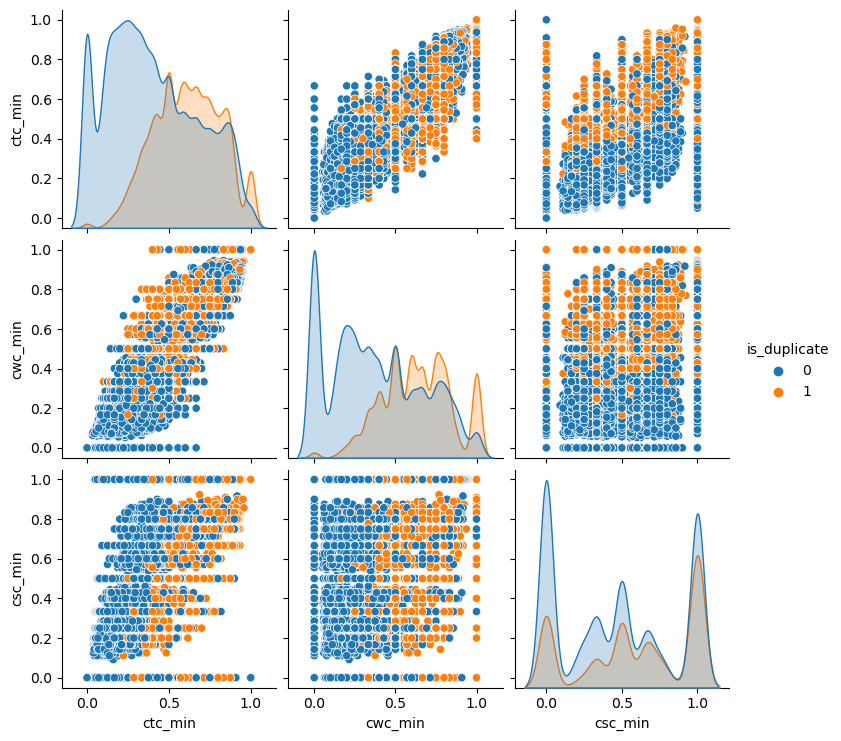

In [15]:
import seaborn as sns

sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

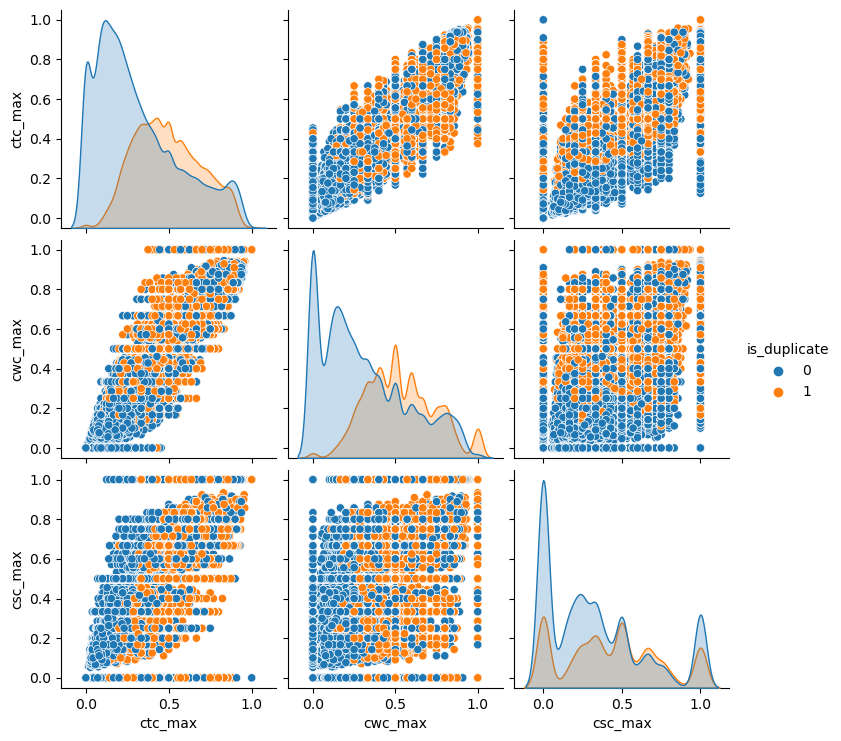

In [16]:
sns.pairplot(df[['ctc_max','cwc_max','csc_max','is_duplicate']], hue='is_duplicate')

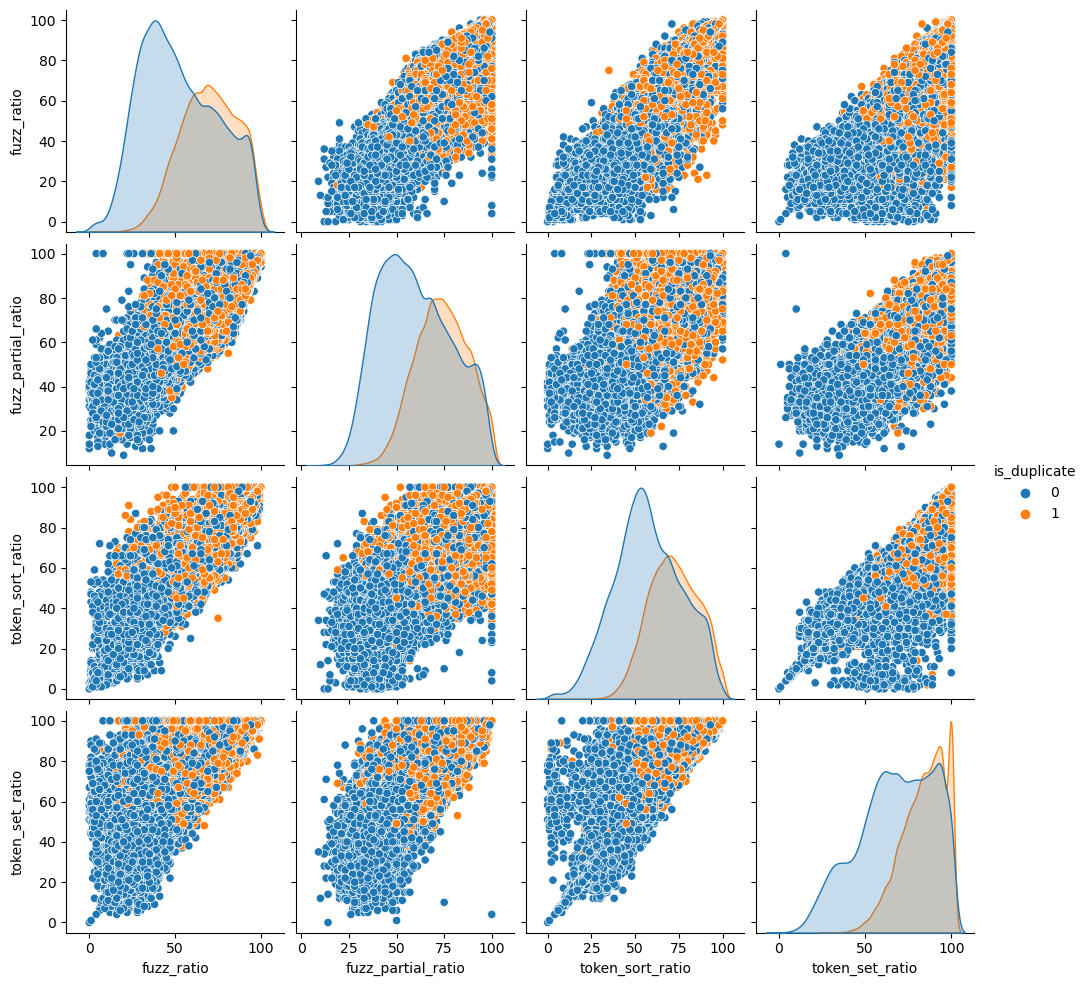

In [17]:
sns.pairplot(df[['fuzz_ratio','fuzz_partial_ratio','token_sort_ratio','token_set_ratio','is_duplicate']], hue='is_duplicate')

In [18]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimentionsns.pairplot(df[['fuzz_ratio','fuzz_partial_ratio','token_sort_ratio','token_set_ratio','is_duplicate']], hue='is_duplicate')
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = df['is_duplicate'].values

In [19]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random',
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 69999 samples in 1.478s...
[t-SNE] Computed neighbors for 69999 samples in 81.363s...
[t-SNE] Computed conditional probabilities for sample 1000 / 69999
[t-SNE] Computed conditional probabilities for sample 2000 / 69999
[t-SNE] Computed conditional probabilities for sample 3000 / 69999
[t-SNE] Computed conditional probabilities for sample 4000 / 69999
[t-SNE] Computed conditional probabilities for sample 5000 / 69999
[t-SNE] Computed conditional probabilities for sample 6000 / 69999
[t-SNE] Computed conditional probabilities for sample 7000 / 69999
[t-SNE] Computed conditional probabilities for sample 8000 / 69999
[t-SNE] Computed conditional probabilities for sample 9000 / 69999
[t-SNE] Computed conditional probabilities for sample 10000 / 69999
[t-SNE] Computed conditional probabilities for sample 11000 / 69999
[t-SNE] Computed conditional probabilities for sample 12000 / 69999
[t-SNE] Computed conditional probabilities for sa

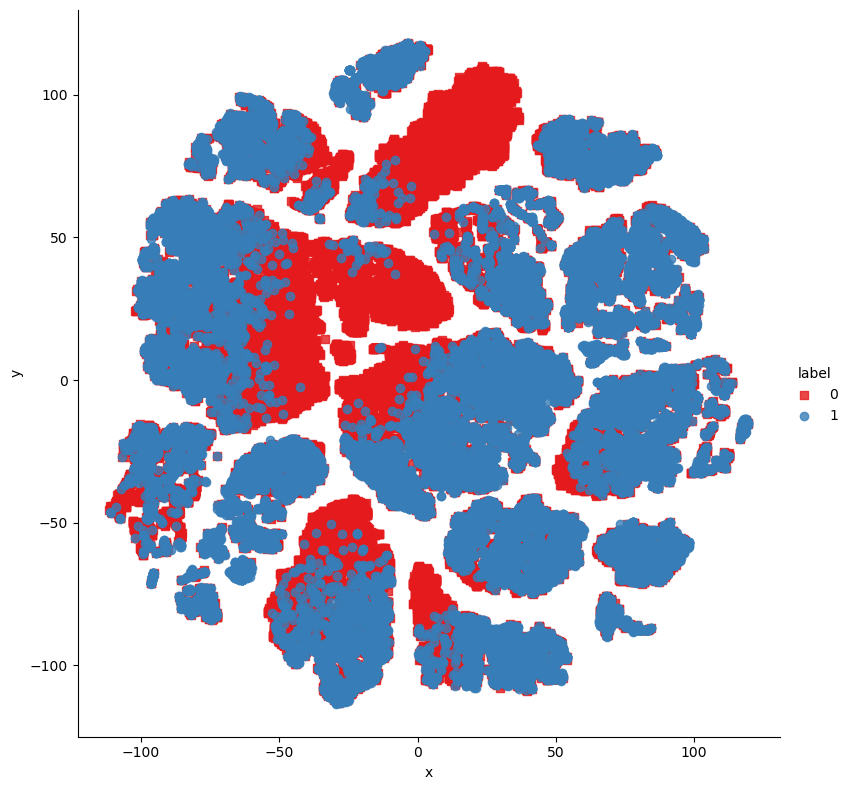

In [20]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, height=8 ,palette="Set1",markers=['s','o'])

In [21]:
dff.head()

,id,qid1,qid2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,q1_stem,q2_stem,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,398782,496695,532029,1,76,77,12,12,11,24,0.46,0.874989,0.874989,0.999975,0.999975,0.916659,0.916659,1,1,what is the best market autom tool for small a...,what is the best market autom tool for small a...,0,13.0,0.985075,100,100,100,100
1,115086,187729,187730,0,49,57,12,15,7,23,0.30,0.833319,0.714276,0.499988,0.333328,0.583328,0.466664,1,1,i am poor but i want to invest . what should i...,i am quit poor and i want to be veri rich . wh...,3,15.5,0.211538,70,71,65,74
2,327711,454161,454162,0,105,120,25,17,2,34,0.06,0.000000,0.000000,0.499988,0.285710,0.117646,0.080000,0,0,i am from india and live abroad . i met a guy ...,t.i.e.t to thapar univers to thapar univers in...,9,23.5,0.046729,32,27,29,40
3,367788,498109,491396,0,59,146,12,30,0,32,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,whi do so mani peopl in the u.s. hate the sout...,my boyfriend doesnt feel guilti when he hurt m...,20,23.0,0.050847,29,43,17,17
4,151235,237843,50930,0,35,50,5,9,3,13,0.23,0.749981,0.499992,0.000000,0.000000,0.599988,0.333330,1,0,consequ of bhopal ga tragedi ?,what wa the reason behind the bhopal ga tragedi ?,4,8.0,0.645161,59,73,51,76


In [22]:
question_df = dff[['q1_stem','q2_stem']]
question_df.head()

,q1_stem,q2_stem
0,what is the best market autom tool for small a...,what is the best market autom tool for small a...
1,i am poor but i want to invest . what should i...,i am quit poor and i want to be veri rich . wh...
2,i am from india and live abroad . i met a guy ...,t.i.e.t to thapar univers to thapar univers in...
3,whi do so mani peopl in the u.s. hate the sout...,my boyfriend doesnt feel guilti when he hurt m...
4,consequ of bhopal ga tragedi ?,what wa the reason behind the bhopal ga tragedi ?


In [23]:
final_df = dff.drop(columns=['id','qid1','qid2','q1_stem','q2_stem'])
print(final_df.shape)
final_df.head()

(69999, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,1,76,77,12,12,11,24,0.46,0.874989,0.874989,0.999975,0.999975,0.916659,0.916659,1,1,0,13.0,0.985075,100,100,100,100
1,0,49,57,12,15,7,23,0.30,0.833319,0.714276,0.499988,0.333328,0.583328,0.466664,1,1,3,15.5,0.211538,70,71,65,74
2,0,105,120,25,17,2,34,0.06,0.000000,0.000000,0.499988,0.285710,0.117646,0.080000,0,0,9,23.5,0.046729,32,27,29,40
3,0,59,146,12,30,0,32,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,20,23.0,0.050847,29,43,17,17
4,0,35,50,5,9,3,13,0.23,0.749981,0.499992,0.000000,0.000000,0.599988,0.333330,1,0,4,8.0,0.645161,59,73,51,76


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(question_df['q1_stem']) + list(question_df['q2_stem'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [25]:
temp_df1 = pd.DataFrame(q1_arr, index=question_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=question_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(69999, 6000)

In [26]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(69999, 6023)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
0             1      76      77            12            12           11   
1             0      49      57            12            15            7   
2             0     105     120            25            17            2   
3             0      59     146            12            30            0   
4             0      35      50             5             9            3   

   word_total  word_share   cwc_min   cwc_max   csc_min   csc_max   ctc_min  \
0          24        0.46  0.874989  0.874989  0.999975  0.999975  0.916659   
1          23        0.30  0.833319  0.714276  0.499988  0.333328  0.583328   
2          34        0.06  0.000000  0.000000  0.499988  0.285710  0.117646   
3          32        0.00  0.000000  0.000000  0.000000  0.000000  0.000000   
4          13        0.23  0.749981  0.499992  0.000000  0.000000  0.599988   

    ctc_max  last_word_eq  first_word_eq  abs_len_diff  mean_len  \
0  0.916659             1              1             0      13.0   
1  0.466664             1              1             3      15.5   
2  0.080000             0              0             9      23.5   
3  0.000000             0              0            20      23.0   
4  0.333330             1              0             4       8.0   

   longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  token_sort_ratio  \
0              0.985075         100                 100               100   
1              0.211538          70                  71                65   
2              0.046729          32                  27                29   
3              0.050847          29                  43                17   
4              0.645161          59                  73                51   

   token_set_ratio  0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  \
0              100  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   
1               74  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   
2               40  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   
3               17  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   
4               76  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   

   17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   1   0 

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:,1:].values, final_df.iloc[:,0].values, test_size=0.2, random_state=1)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8086428571428571

In [98]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train,y_train)
y_pred1=xg.predict(X_test)
accuracy_score(y_test,y_pred1)

0.8047142857142857

In [104]:
from sklearn.linear_model import LogisticRegression
logist_reg = LogisticRegression()
logist_reg.fit(X_train,y_train)
y_pred2=logist_reg.predict(X_test)
accuracy_score(y_test,y_pred2)

0.7292857142857143

In [30]:
import sklearn
print(sklearn.__version__)

1.2.1


In [95]:
from sklearn.metrics import confusion_matrix

In [103]:
#for random forest model
confusion_matrix(y_test,y_pred)

array([[7391, 1428],
       [1306, 3875]], dtype=int64)

In [102]:
#for xgboost model
confusion_matrix(y_test,y_pred1)

array([[7391, 1428],
       [1306, 3875]], dtype=int64)

In [105]:
#for logisticReg model
confusion_matrix(y_test,y_pred2)

array([[7198, 1621],
       [2169, 3012]], dtype=int64)

In [ ]:
#for SVM model
confusion_matrix(y_test,y_pred3)

In [87]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [88]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [89]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [90]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [91]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [92]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [94]:
rf.predict(query_point_creator(q1,q2))

array([0], dtype=int64)

In [ ]:
import pickle

pickle.dump(rf,open('quora_model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))

In [1]:
import pickle

with open('quora_model.pkl','rb') as file:
    loaded_model=pickle.load(file)